In [1]:
# Let's check the GPU - it should be a Tesla T4

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
  if gpu_info.find('Tesla T4') >= 0:
    print("Success - Connected to a T4")
  else:
    print("NOT CONNECTED TO A T4")

Tue Oct  7 17:02:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   61C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
! pip install -q transformers datasets diffusers

In [7]:
import torch
import soundfile as sf
from IPython.display import Audio
from IPython.display import Image
from transformers import pipeline
from datasets import load_dataset
from diffusers import DiffusionPipeline
from diffusers import AutoPipelineForText2Image
from google.colab import userdata
from huggingface_hub import login

In [8]:
hf_token = userdata.get('HF_TOKEN_1')
login(hf_token, add_to_git_credential=True)

In [ ]:
classifier = pipeline("sentiment-analysis", device = 'cuda')
result = classifier("I'm super excited to be on the way to LLM mastery!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9993460774421692}]


In [ ]:
ner = pipeline('ner',device = 'cuda', grouped_entities = True)
result = ner("Barack Obama was the president of the United States.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'entity_group': 'PER', 'score': np.float32(0.9992754), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.99965036), 'word': 'United States', 'start': 38, 'end': 51}]


/usr/local/lib/python3.12/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [ ]:
question_answer = pipeline('question-answering',device = 'cuda')

context = """
The 40th president of the United States was Ronald Reagan, who served from 1981 to 1989.
The 41st president was George H. W. Bush, serving from 1989 to 1993.
The 42nd president was Bill Clinton, serving from 1993 to 2001.
The 43rd president was George W. Bush, serving from 2001 to 2009.
The 44th president was Barack Obama, serving from 2009 to 2017.
The 45th president was Donald Trump, serving from 2017 to 2021.
The 46th president is Joe Biden, who took office in 2021.
"""

result = question_answer(question = "Who was the 44th president of the United States?",context = context)
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'score': 0.9928296804428101, 'start': 312, 'end': 324, 'answer': 'Barack Obama'}


In [ ]:
summarizer = pipeline('summarization',device = 'cuda')
text = """The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing (NLP).It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering, among others.It's an extremely popular library that's widely used by the open-source data science community.It lowers the barrier to entry into the field by providing Data Scientists with a productive, convenient way to work with transformer models."""
result = summarizer(text, max_length = 60, min_length = 20, do_sample = False)

print(result)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'summary_text': ' Hugging Face transformers library is incredibly versatile and powerful tool for natural language processing (NLP) It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering .'}]


In [ ]:
translator = pipeline('translation_en_to_fr',device = 'cuda')
result = translator('I am trying to get knowledge about HuggingFace')
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


Je m'efforce d'acquérir des connaissances sur HuggingFace


In [ ]:
classifier = pipeline('zero-shot-classification', device = 'cuda')
result = classifier("Hugging Face's Transformers library is amazing!",candidate_labels = ['technology','sports','clean'])
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'sequence': "Hugging Face's Transformers library is amazing!", 'labels': ['technology', 'clean', 'sports'], 'scores': [0.9165175557136536, 0.05234885215759277, 0.03113361820578575]}


In [10]:
classifier = pipeline('zero-shot-classification', device = 'cuda')
result = classifier('I will do good in my interview tomorrow', candidate_labels = ['tech','study','job'])
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'sequence': 'I will do good in my interview tomorrow', 'labels': ['job', 'tech', 'study'], 'scores': [0.6670657992362976, 0.16951055824756622, 0.16342367231845856]}


In [9]:
generate = pipeline('text-generation',device = 'cuda')
result = generate("If there's one thing I want you to remember about using HuggingFace pipelines, it's")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there's one thing I want you to remember about using HuggingFace pipelines, it's that it's hard to get started. But when you make a small use – when you're really happy with it – then you can pull it off.

But that's not going to happen.

I still use it daily, but I've been using it a lot more often. I'm going to try and see how it affects my style, so I promise.

The most useful thing for me is that HuggingFace is going to take care of things that you'd want to change.

Let me give you a break, and a brief history of HuggingFace:

It was created by Peter.

Peter was actually on a mission to make HuggingFace better.

He was using the Hugger framework to make some of the very best features in the Hugger community.

He was a co-founder of the GitHub team and he had a couple of years of experience working on the Hugger ecosystem.

I think his passion was to make it better for everyone.

I think he was really passionate about the Hugger community and he really wanted to have the best po

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

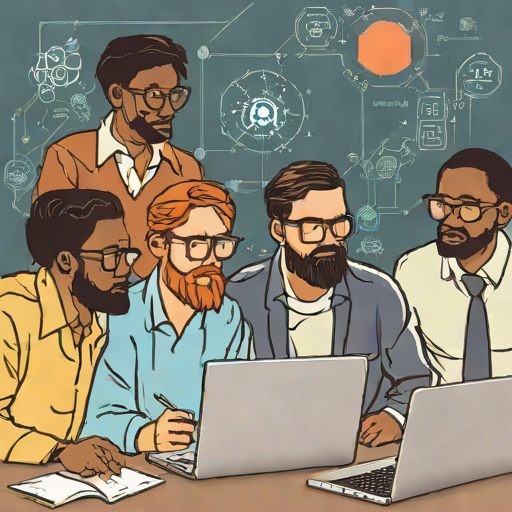

In [19]:
image_trained = AutoPipelineForText2Image.from_pretrained(
    'stabilityai/sdxl-turbo',
    torch_dtype = torch.float16,
    variant = 'fp16'
)
image_trained.to('cuda')

prompt = 'A group of brilliant Data scientists thinking about something'
result = image_trained(prompt = prompt,num_inference_steps = 4, guidance_scale = 0.5).images[0]
display(result)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

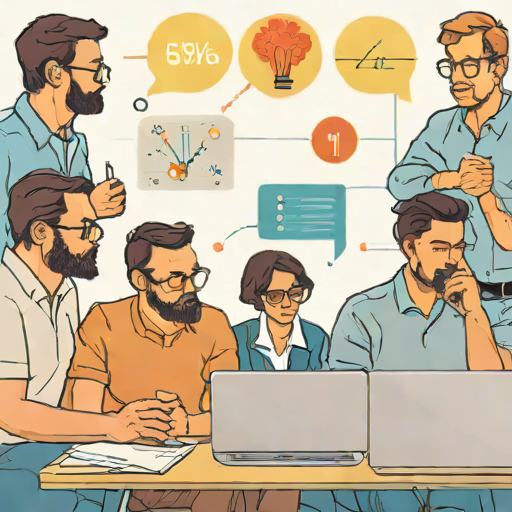

In [28]:
image_torch = AutoPipelineForText2Image.from_pretrained(
    'stabilityai/sdxl-turbo',
    torch_dtype = torch.float16,
    variant = 'fp16'
)
image_torch.to('cuda')
prompt = 'A group of brilliant Data scientists thinking about something'
image = image_torch(prompt = prompt,num_inference_steps = 4, guidance_scale = 1.0).images[-1]
display(image)